# K-Means Clustering : Cars Data

Let's look at a clustering example.

Here, we are going to load the mtcars dataset. This has some stats on different models of cars.  Here, we will load the CSV file as a pandas dataframe, and view it.

And here is a [spreadsheet](WSSSE-versus-k.xlsx) for you record K and WSSSE.

## Step 1: Load the Data

In [0]:
%matplotlib inline

import pandas as pd
from matplotlib import pyplot
from sklearn.cluster import KMeans





In [0]:
dataset = pd.read_csv("https://s3.amazonaws.com/elephantscale-public/data/cars/mtcars_header.csv")


In [3]:
dataset.head()

model   mpg  cyl   disp   hp  drat     wt   qsec  vs  am  gear  \
0          Mazda RX4  21.0    6  160.0  110  3.90  2.620  16.46   0   1     4   
1      Mazda RX4 Wag  21.0    6  160.0  110  3.90  2.875  17.02   0   1     4   
2         Datsun 710  22.8    4  108.0   93  3.85  2.320  18.61   1   1     4   
3     Hornet 4 Drive  21.4    6  258.0  110  3.08  3.215  19.44   1   0     3   
4  Hornet Sportabout  18.7    8  360.0  175  3.15  3.440  17.02   0   0     3   

   carb  
0     4  
1     4  
2     1  
3     1  
4     2

In [4]:
dataset

model   mpg  cyl   disp   hp  drat     wt   qsec  vs  am  \
0             Mazda RX4  21.0    6  160.0  110  3.90  2.620  16.46   0   1   
1         Mazda RX4 Wag  21.0    6  160.0  110  3.90  2.875  17.02   0   1   
2            Datsun 710  22.8    4  108.0   93  3.85  2.320  18.61   1   1   
3        Hornet 4 Drive  21.4    6  258.0  110  3.08  3.215  19.44   1   0   
4     Hornet Sportabout  18.7    8  360.0  175  3.15  3.440  17.02   0   0   
5               Valiant  18.1    6  225.0  105  2.76  3.460  20.22   1   0   
6            Duster 360  14.3    8  360.0  245  3.21  3.570  15.84   0   0   
7             Merc 240D  24.4    4  146.7   62  3.69  3.190  20.00   1   0   
8              Merc 230  22.8    4  140.8   95  3.92  3.150  22.90   1   0   
9              Merc 280  19.2    6  167.6  123  3.92  3.440  18.30   1   0   
10            Merc 280C  17.8    6  167.6  123  3.92  3.440  18.90   1   0   
11           Merc 450SE  16.4    8  275.8  180  3.07  4.070  17.40   0   0   
12           Merc 450SL  17.3    8  275.8  180  3.07  3.730  17.60   0   0   
13          Merc 450SLC  15.2    8  275.8  180  3.07  3.780  18.00   0   0   
14   Cadillac Fleetwood  10.4    8  472.0  205  2.93  5.250  17.98   0   0   
15  Lincoln Continental  10.4    8  460.0  215  3.00  5.424  17.82   0   0   
16    Chrysler Imperial  14.7    8  440.0  230  3.23  5.345  17.42   0   0   
17             Fiat 128  32.4    4   78.7   66  4.08  2.200  19.47   1   1   
18          Honda Civic  30.4    4   75.7   52  4.93  1.615  18.52   1   1   
19       Toyota Corolla  33.9    4   71.1   65  4.22  1.835  19.90   1   1   
20        Toyota Corona  21.5    4  120.1   97  3.70  2.465  20.01   1   0   
21     Dodge Challenger  15.5    8  318.0  150  2.76  3.520  16.87   0   0   
22          AMC Javelin  15.2    8  304.0  150  3.15  3.435  17.30   0   0   
23           Camaro Z28  13.3    8  350.0  245  3.73  3.840  15.41   0   0   
24     Pontiac Firebird  19.2    8  400.0  175  3.08  3.845  17.05   0   0   
25            Fiat X1-9  27.3    4   79.0   66  4.08  1.935  18.90   1   1   
26        Porsche 914-2  26.0    4  120.3   91  4.43  2.140  16.70   0   1   
27         Lotus Europa  30.4    4   95.1  113  3.77  1.513  16.90   1   1   
28       Ford Pantera L  15.8    8  351.0  264  4.22  3.170  14.50   0   1   
29         Ferrari Dino  19.7    6  145.0  175  3.62  2.770  15.50   0   1   
30        Maserati Bora  15.0    8  301.0  335  3.54  3.570  14.60   0   1   
31           Volvo 142E  21.4    4  121.0  109  4.11  2.780  18.60   1   1   

    gear  carb  
0      4     4  
1      4     4  
2      4     1  
3      3     1  
4      3     2  
5      3     1  
6      3     4  
7      4     2  
8      4     2  
9      4     4  
10     4     4  
11     3     3  
12     3     3  
13     3     3  
14     3     4  
15     3     4  
16     3     4  
17     4     1  
18     4     2  
19     4     1  
20     3     1  
21     3     2  
22     3     2  
23     3     4  
24     3     2  
25     4     1  
26     5     2  
27     5     2  
28     5     4  
29     5     6  
30     5     8  
31     4     2

## Step 2: Creating Vectors

Now that we have ourselves a dataframe, let's work on turning it into vectors.  We're going to vectorize 2 columns:

1. MPG
2. Number of cylinders.


In [5]:
## TODO: create an mpg_cyl dataframe with just 'model', 'mpg', and 'cyl'

mpg_cyl = dataset[['model','mpg','cyl']]

mpg_cyl["model_index"] = pd.factorize(dataset['model'])[0]

mpg_cyl.drop(['model'], axis = 1, inplace = True)

mpg_cyl.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


mpg  cyl  model_index
0  21.0    6            0
1  21.0    6            1
2  22.8    4            2
3  21.4    6            3
4  18.7    8            4

In [0]:

## TODO: transform dataframe into 2-D ndarray in order to create new column with feature vector

featureVector = mpg_cyl


In [7]:
featureVector.head()

mpg  cyl  model_index
0  21.0    6            0
1  21.0    6            1
2  22.8    4            2
3  21.4    6            3
4  18.7    8            4

## Step 3: Running Kmeans

Now it's time to run kmeans on the resultant dataframe.  We don't know what value of k to use, so let's just start with k=2.  This means we will cluster into two groups.

We will fit a model to the data, and then train it.



In [8]:
## TODO: Instantiate K-means model with value k
k = 2
kmeans = KMeans(n_clusters=k, random_state=0)

## TODO: fit featureVector with kmeans model
## Hint : featureVector
model = kmeans.fit(featureVector)

## TODO: calculate WSSSE by calling computeCost on dataframe
## Hint : inertia_
wssse = model.inertia_

print(wssse)

1747.693725490196


The WSSSE for this is not particularly good.  We will probably need to change k.

Let's take a look at the transformed dataset.  Notice the new column "prediction."


In [9]:
## transform the dataset from the model
model.labels_ # these are the cluster ids

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [10]:
### TODO: Add new column to DF with cluster labels 
dataset['Cluster_Labels'] = model.labels_
dataset.head()

model   mpg  cyl   disp   hp  drat     wt   qsec  vs  am  gear  \
0          Mazda RX4  21.0    6  160.0  110  3.90  2.620  16.46   0   1     4   
1      Mazda RX4 Wag  21.0    6  160.0  110  3.90  2.875  17.02   0   1     4   
2         Datsun 710  22.8    4  108.0   93  3.85  2.320  18.61   1   1     4   
3     Hornet 4 Drive  21.4    6  258.0  110  3.08  3.215  19.44   1   0     3   
4  Hornet Sportabout  18.7    8  360.0  175  3.15  3.440  17.02   0   0     3   

   carb  Cluster_Labels  
0     4               0  
1     4               0  
2     1               0  
3     1               0  
4     2               0

Notice what we have here.  We have two clusters. One is smaller, fuel efficient cars like the Fiat and the Corolla (remember, we cluster on two variables only: MPG and cylinders).  The other is for basically oll other cars.  Probably, we can get better results here with a differnet value of k.

In [11]:
k = 3
wssse = KMeans(n_clusters=k, random_state=0).fit(featureVector).inertia_
print('WSSSE: ' + str(wssse))

WSSSE: 1088.7734523809522


This is a much better result for WSSSE (lower is better).

## Step 4: Hyperparameter tuning

Let's try iterating and plotting over values of k, so we can practice using the elbow method.

**Q ==> Why is WSSSE almost zero when k=32?**

In [12]:
kvals = []
wssses = []

# TODO : Run k from 2 to 32
for k in range(2,32):
    wssse = KMeans(n_clusters=k, random_state=0).fit(featureVector).inertia_
    print ("k={},  wssse={}".format(k,wssse))
    kvals.append(k)
    wssses.append(wssse)

k=2,  wssse=1747.693725490196
k=3,  wssse=1088.7734523809522
k=4,  wssse=650.3717936507936
k=5,  wssse=508.8972857142857
k=6,  wssse=393.9145
k=7,  wssse=308.04128571428566
k=8,  wssse=255.2878333333333
k=9,  wssse=197.88416666666666
k=10,  wssse=154.89249999999993
k=11,  wssse=122.97416666666666
k=12,  wssse=99.46166666666664
k=13,  wssse=81.04833333333332
k=14,  wssse=67.22166666666665
k=15,  wssse=53.848333333333315
k=16,  wssse=42.97333333333333
k=17,  wssse=36.76333333333333
k=18,  wssse=31.09666666666666
k=19,  wssse=25.651666666666664
k=20,  wssse=22.17166666666666
k=21,  wssse=17.869999999999997
k=22,  wssse=14.554999999999996
k=23,  wssse=11.874999999999996
k=24,  wssse=9.374999999999998
k=25,  wssse=7.054999999999998
k=26,  wssse=5.275000000000001
k=27,  wssse=3.7950000000000035
k=28,  wssse=2.4500000000000024
k=29,  wssse=1.5450000000000004
k=30,  wssse=1.0
k=31,  wssse=0.5


In [13]:
df = pd.DataFrame({'k': kvals, 'wssse':wssses})
df

k        wssse
0    2  1747.693725
1    3  1088.773452
2    4   650.371794
3    5   508.897286
4    6   393.914500
5    7   308.041286
6    8   255.287833
7    9   197.884167
8   10   154.892500
9   11   122.974167
10  12    99.461667
11  13    81.048333
12  14    67.221667
13  15    53.848333
14  16    42.973333
15  17    36.763333
16  18    31.096667
17  19    25.651667
18  20    22.171667
19  21    17.870000
20  22    14.555000
21  23    11.875000
22  24     9.375000
23  25     7.055000
24  26     5.275000
25  27     3.795000
26  28     2.450000
27  29     1.545000
28  30     1.000000
29  31     0.500000

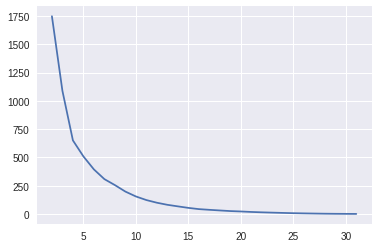

In [14]:
## TODO: plot the values of k as the X axis versus the costs (WSSSE) as the y axis
## Hint  : x=kvals,  y=wssses
pyplot.plot(kvals,wssses)

Using the Elbow method, what would be a good value of k?
